In [20]:
# Use the iris database to answer the following quesitons:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. What does the distribution of petal lengths look like?
iris = sns.load_dataset('iris')
iris
sns.distplot(iris.petal_length)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# 2. Is there a correlation between petal length and petal width?
# YES THERE IS A STRONG POSITIVE CORRELATION BETWEEN PETAL LENGTH AND WIDTH. 0.9628

iris_petal_lw = iris[['petal_length', 'petal_width']]

iris_petal_lw

iris_petal_lw.corr()

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


In [4]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length?
# YES BECAUSE THERE ARE DIFFERENT CORRELATIONS FOR EVERY SPECIES AND THEY ARE SIGNIFICANTLY DIFFERENT.

iris['species'].unique()


iris_sepal_lw_species = iris[['sepal_length','sepal_width','species']].groupby('species')
iris_sepal_lw_species.corr()

sepal_length  sepal_width
species                                           
setosa     sepal_length      1.000000     0.742547
           sepal_width       0.742547     1.000000
versicolor sepal_length      1.000000     0.525911
           sepal_width       0.525911     1.000000
virginica  sepal_length      1.000000     0.457228
           sepal_width       0.457228     1.000000

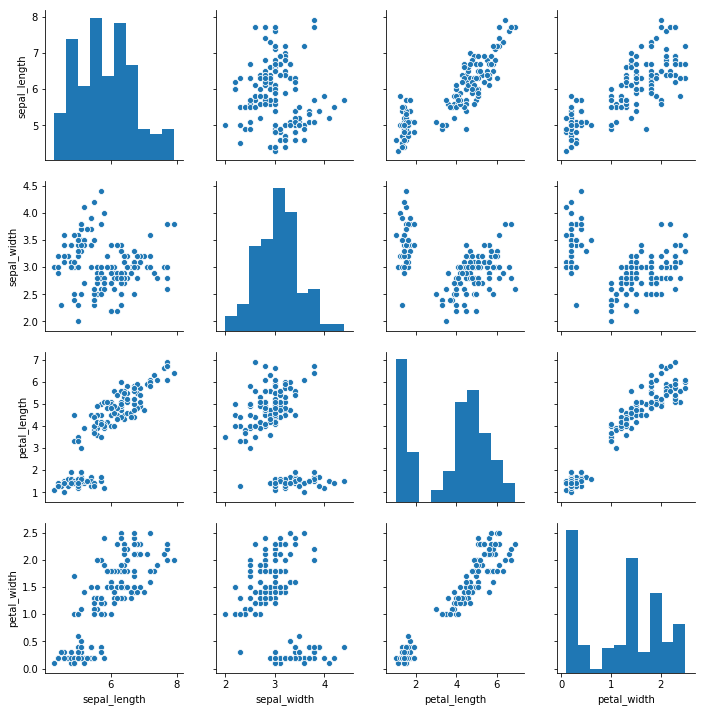

In [5]:
# 4. Which features would be best used to predict species?

sns.pairplot(iris)

Groups summary stats:
Group I is a weak linear relationship 
 Group II is a parabolic relationship 
 Group III is linear with an outlier 
 Group IV is a vertical line with an outlier


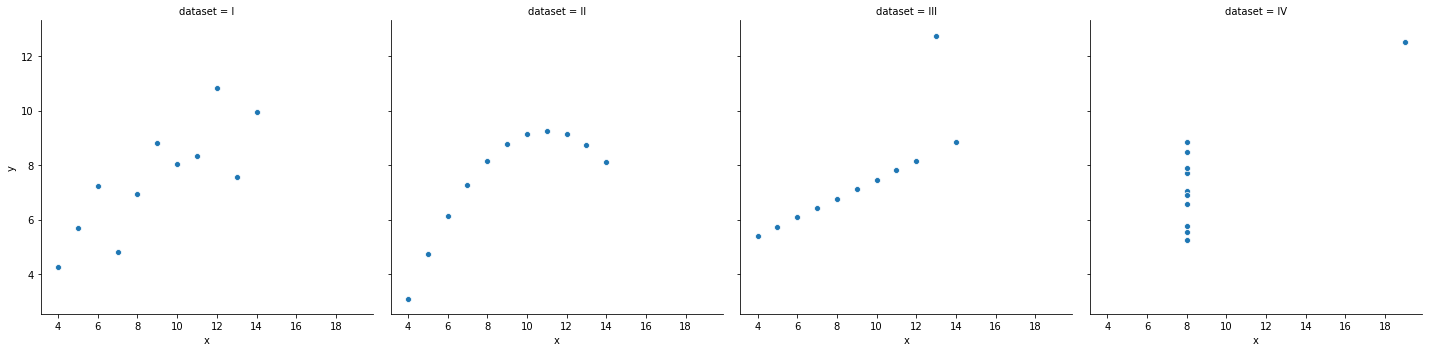

In [6]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
# What do you notice?
#Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
ansc = sns.load_dataset('anscombe')
ansc

groups = ansc.groupby('dataset')
print('Groups summary stats:')
groups.describe()


sns.relplot(data=ansc, x='x', y='y', col='dataset')
print('Group I is a weak linear relationship \n Group II is a parabolic relationship \n Group III is linear with an outlier \n Group IV is a vertical line with an outlier')


In [7]:

# 2. Load the InsectSprays dataset and read it's documentation. 
# Create a boxplot that shows the effectiveness of the different insect sprays.

from pydataset import data

insect_sprays = data('InsectSprays')
insect_sprays
# data('InsectSprays', show_doc=True)

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


In [8]:
insect_sprays.dtypes


count     int64
spray    object
dtype: object

In [9]:
types_of_sprays = insect_sprays.groupby('spray')
types_of_sprays.describe()

count                                                    
      count       mean       std  min    25%   50%    75%   max
spray                                                          
A      12.0  14.500000  4.719399  7.0  11.50  14.0  17.75  23.0
B      12.0  15.333333  4.271115  7.0  12.50  16.5  17.50  21.0
C      12.0   2.083333  1.975225  0.0   1.00   1.5   3.00   7.0
D      12.0   4.916667  2.503028  2.0   3.75   5.0   5.00  12.0
E      12.0   3.500000  1.732051  1.0   2.75   3.0   5.00   6.0
F      12.0  16.666667  6.213378  9.0  12.50  15.0  22.50  26.0

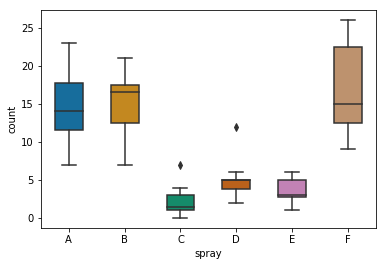

In [10]:
sns.boxplot(data=insect_sprays, y='count', x='spray', width=0.5, palette="colorblind")


In [11]:
# 3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

from pydataset import data
swiss = data('swiss')
# data('swiss', show_doc=True)
swiss.describe()
swiss.head(20)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [12]:
#     * Create a column named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)
#cutoff is 50.0%

swiss['is_Catholic'] = swiss['Catholic'] > 50.0
# swiss['is_Catholic']
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_Catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


In [13]:
#     * Does whether or not a province is Catholic influence fertility?
# for a cutoff of 50% Catholic in a province, there does not seem to be a strong correlation

swiss_Catholic_and_fertility = swiss[['Fertility','is_Catholic']]
swiss_Catholic_and_fertility.corr()


,Fertility,is_Catholic
Fertility,1.000000,0.402813
is_Catholic,0.402813,1.000000


In [14]:
#     * What measure correlates most strongly with fertility?
#There's a weak correlation between being Catholic and Fertility
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_Catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_Catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


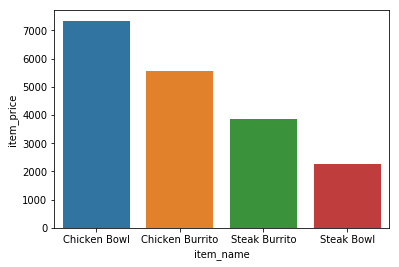

In [15]:
# 4. Using the chipotle dataset from the previous exercise, 
# create a barplot that shows the 4 most popular items and the revenue produced by each.

def get_db_url(user, pw, host, db):
    from sqlalchemy import create_engine
    from env import user, pw, host
    url = 'mysql+pymysql://{}:{}@{}/{}'.format(user, pw, host, db)
    return url

import pandas as pd
from env import user, host, pw
from sqlalchemy import create_engine

conn = create_engine(get_db_url(user, host, pw,'chipotle'))

total_orders = pd.read_sql('select item_price, item_name from orders', conn)
total_orders['item_price'] = total_orders['item_price'].str.replace('$','')
total_orders['item_price'] = total_orders['item_price'].astype(float)

most_revenue_by_items = total_orders.groupby('item_name').sum().sort_values(by='item_price', ascending=False)
most_revenue_by_items.head(4)

top_4_items = most_revenue_by_items.head(4)

sns.barplot(data=top_4_items.reset_index(), x='item_name', y='item_price')


In [16]:
# 5. Load the sleepstudy data and read it's documentation. 
#Use seaborn to create a line plot of all the individual subject's reaction times and 
#a more prominant line showing the average change in reaction time.

sleep = data('sleepstudy')
# data('sleepstudy', show_doc=True)
sleep
# sleep[['Subject']].nunique()


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
6,414.6901,5,308
7,382.2038,6,308
8,290.1486,7,308
9,430.5853,8,308
10,466.3535,9,308


In [19]:
plt.figure(figsize=(12,10))
sns.lineplot(data=sleep, x='Days',y='Reaction')
sns.lineplot(data=sleep, x='Days',y='Reaction', hue='Subject')

avg = sleep[['Reaction', 'Days']].groupby('Days', as_index=False).agg(np.mean)

sns.lineplot(data=avg, x='Days',y='Reaction')
plt.show()